In [85]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

MCMC for the collapsed chain to sample the V-shaped distribution:
$$\pi_k = \frac{4}{n^2} \left| \frac{n+1}2 - k\right|$$
for $k \in [1, n]$. We index the chain from $0$ to $n+1$, with the sites at the ends of the chain being phantom sites with probability $0$.

In [73]:
def collapsed_mcmc(pos_ini, n_steps, n):
    """Run the MCMC for the collapsed chain to sample the V-shaped distribution. The chain length n must be even"""
    assert 1 - n%2,"n should be even"
    v_shaped_distribution = [0] + [(4 / n**2) * abs((n + 1)/2 - k) for k in range(1, n+1)] + [0]
    pos = pos_ini
    for k in range(n_steps):
        x = np.random.random()
        direction = 2 * np.random.randint(2) - 1
        if x < v_shaped_distribution[pos+direction] / v_shaped_distribution[pos]:
            pos += direction
    return pos

collapsed_mcmc(1, 100, 4)

1

In [119]:
def mcmc_runs(mcmc, pos_ini, n_steps, n, n_runs):
    """
    Run the monte-carlo algorithm mcmc many times and return the empiric distribution over n_runs runs
    as well as its distance from the target distribution
    
    Args: 
        mcmc (function): function that takes pos_ini, n_steps and n and returns a position on the chain
        pos_ini (int): initial position
        n_steps (int): number of steps for each monte-carlo run
        n (int): length of the chain
        n_runs (int): number of times to run the monte-carlo algorithm
    
    Returns:
        <float>: empiric distribution obtained after the runs
        <float>: target distribution
        int: distance between the empiric and target distribution
    """
    histogram = []
    for k in tqdm(range(n_runs)):
        histogram.append(collapsed_mcmc(pos_ini, n_steps, n))
    empiric_distribution = [histogram.count(k)/n_runs for k in range(1, n+1)]
    phantomless_dis = [(4 / n**2) * abs((n + 1)/2 - k) for k in range(1, n+1)]
    distance = (1/2) * np.sum(abs(np.array(empiric_distribution) - np.array(phantomless_dis)))
    return empiric_distribution, phantomless_dis, distance

def compute_TVD(mcmc, pos_ini, n, n_runs, epsilon=1/4):
    """
    Return the empiric TVD over the number of runs.
    
    Args: 
        mcmc (function): function that takes pos_ini, n_steps and n and returns a position on the chain
        pos_ini (int): initial position
        n (int): length of the chain
        n_runs (int): number of times to run the monte-carlo algorithm
        epsilon (float): epsilon that defines the threshold in TVD
    
    Returns:
        int: the TVD
    """
    n_steps = 0
    pos_list = [pos_ini]*n_runs
    empiric_distribution = [pos_list.count(k)/n_runs for k in range(1, n+1)]
    phantomless_dis = [(4 / n**2) * abs((n + 1)/2 - k) for k in range(1, n+1)]
    distance = (1/2) * np.sum(abs(np.array(empiric_distribution) - np.array(phantomless_dis)))
    distance_list = [distance]
    while distance > epsilon:
        n_steps += 1
        pos_list = [mcmc(pos, 1, n) for pos in pos_list]
        empiric_distribution = [pos_list.count(k)/n_runs for k in range(1, n+1)]
        distance = (1/2) * np.sum(abs(np.array(empiric_distribution) - np.array(phantomless_dis)))
        distance_list.append(distance)
    return n_steps, distance_list

  0%|          | 0/100 [00:00<?, ?it/s]

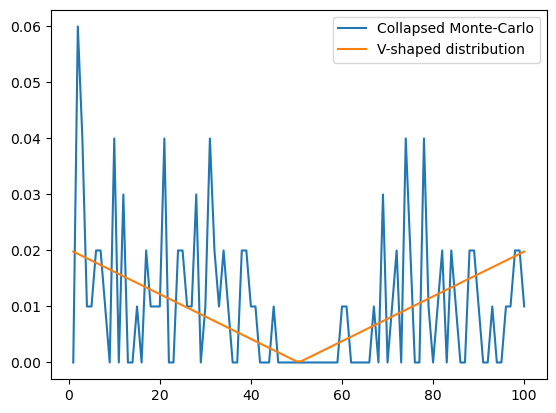

In [136]:
# Initial position
pos_ini = 50

# Number of steps
n_steps = 1000

# Chain length
n = 100

# Number of runs
n_runs = 100

empiric_distribution, phantomless_dis, distance = mcmc_runs(collapsed_mcmc, pos_ini, n_steps, n, n_runs)

plt.plot(list(range(1, n+1)), empiric_distribution, label="Collapsed Monte-Carlo")
plt.plot(list(range(1, n+1)), phantomless_dis, label="V-shaped distribution")
plt.legend()
print()

TVD:  152


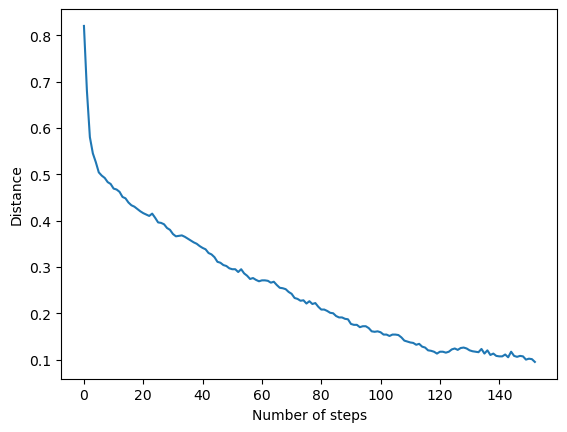

In [122]:
# Initial position
pos_ini = 1

# Number of steps
n_steps = 10000

# Chain length
n = 10

# Number of runs
n_runs = 1000

TVD, distance_list = compute_TVD(collapsed_mcmc, pos_ini, n, n_runs, epsilon=0.1)

plt.plot(distance_list)
plt.xlabel("Number of steps")
plt.ylabel("Distance")
print("TVD: ", TVD)

In [ ]:
# TODO

def lifted_mcmc(pos_ini, n_steps, n, resampling_rate):
    """MCMC for the lifted chain to sample the V-shaped distribution. The chain length n must be even"""
    assert 1 - n%2, "n should be even"
    v_shaped_distribution = [0] + [(4 / n**2) * abs((n + 1)/2 - k) for k in range(1, n+1)] + [0]
    pos = pos_ini, 1
    for k in range(n_steps):
        # Transport
        x = np.random.random()
        direction = 2 * np.random.randint(2) - 1
        if x < v_shaped_distribution[pos+direction] / v_shaped_distribution[pos]:
            pos += direction
        # Resampling
        
    return pos

collapsed_mcmc(1, 100, 4)